# Calculando o retorno de uma carteira de ações

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

# Carregando a carteira

PG = Procter & Gamble

MSFT = Microsoft

F = Ford

GE = General Electric


In [4]:
tickers = ['PG', 'MSFT', 'F', 'GE']
myData = pd.DataFrame()
for t in tickers:
    myData[t] = pdr.data.DataReader(t, data_source= 'yahoo', start= '1995-1-1')['Adj Close']

In [5]:
myData.head(5)

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.114557,2.389259,4.380183,4.119593
1995-01-04,8.049510,2.406627,4.498034,4.119593
1995-01-05,7.935676,2.366929,4.458752,4.129690
1995-01-06,7.951943,2.406627,4.458752,4.109495
1995-01-09,7.919417,2.391740,4.537320,4.069108


In [6]:
myData.tail(5)

,PG,MSFT,F,GE
Date,,,,
2021-05-07,135.149994,252.460007,11.82,13.30
2021-05-10,137.669998,247.179993,11.71,13.35
2021-05-11,136.990005,246.229996,11.58,13.09
2021-05-12,135.539993,239.000000,11.33,12.82
2021-05-13,137.720001,243.029999,11.55,12.95


In [7]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6638 entries, 1995-01-03 to 2021-05-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6638 non-null   float64
 1   MSFT    6638 non-null   float64
 2   F       6638 non-null   float64
 3   GE      6638 non-null   float64
dtypes: float64(4)
memory usage: 259.3 KB


In [9]:
# localizando a primeira linha dos dados com '.iloc' 
myData.iloc[0]

PG      8.114557
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

# Normalização base 100

Pt/P0 * 100

Muito importante normalizar quando comparamos ações. 

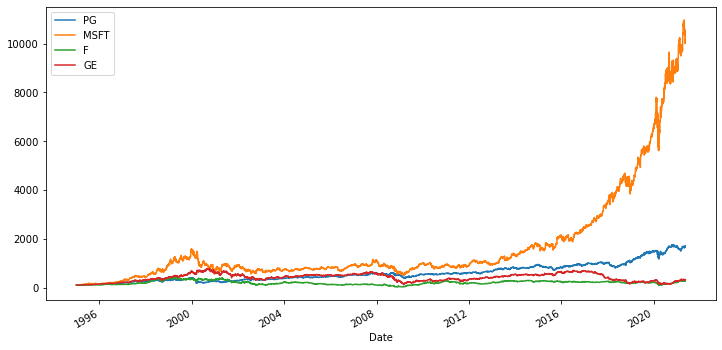

In [10]:
# Visualizando com NORMALIZAÇÂO

(myData / myData.iloc[0] * 100).plot(figsize= (12, 6))
plt.show()

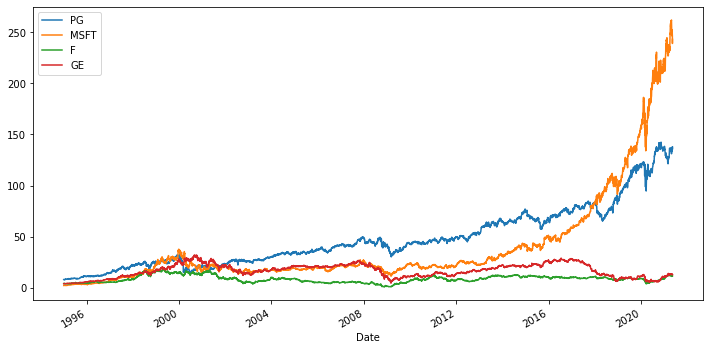

In [11]:
# Visualizando Sem Normalização

myData.plot(figsize = (12, 6))
plt.show()

# Calculando o Retorno do Portifólio

Usaremos o cálculo de retorno simples, ideal para quando comparamos ações

In [12]:
retorno = (myData / myData.shift(1)) - 1
retorno.head(5)

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002050,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [13]:
# Peso das ações na carteira

peso = np.array([0.25, 0.25, 0.25, 0.25])

In [15]:
# Calculando o retorno médio Anual das ações 

retornoAnual = retorno.mean() * 250
retornoAnual

PG      0.132117
MSFT    0.223823
F       0.116183
GE      0.094634
dtype: float64

In [16]:
# Calculando o produto do peso de cada ação e seu respectivo retorno.
# Usaremos o comando '.dot', que efetua uma multiplicação de matrizes 

retCarteira = np.dot(retornoAnual, peso)
retCarteira

0.1416892305775948

In [17]:
carteira_1 = str(round(retCarteira, 4) * 100) + ' %'
print(carteira_1)

14.17 %


# Retorno da Carteira_1 = 14,17%

Podemos comparar a rentabilidade da carteira modificando os pesos das ações.
Criando a carteira_2

In [18]:
# Definindo novos pesos
peso_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [19]:
retCarteira_2 = np.dot(retornoAnual, peso_2)
retCarteira_2

0.16453521574187435

In [20]:
carteira_2 = str(round(retCarteira_2, 4) * 100) + ' %'
print(carteira_2)

16.45 %


# Retorno Carteira_2 = 16,45% 
Mudando o peso das ações, conseguimos uma taxa de retorno maior